# Import all the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import sklearn
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score,recall_score

# Loading Data

In [2]:
data=pd.read_csv("phishing_website_detection.csv")
data.head(10)

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,6,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
6,7,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,8,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,9,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
9,10,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1


# Preprocessing Data

In [3]:
data.drop("id",axis=1,inplace=True)
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [4]:
data.isnull()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [6]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

<AxesSubplot:xlabel='Result', ylabel='count'>

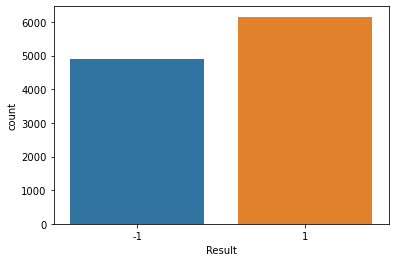

In [7]:
sns.countplot(x="Result", data=data)

# Training Dataset

In [8]:
#split into parameters and label for supervised learning
X=data.drop("Result",axis=1)
Y=data["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Random Forest Classifier

In [9]:
best_performing_parameters = [{'n_estimators': [100, 700],'max_features': ['sqrt', 'log2'],'criterion' :['gini', 'entropy']}]
grid_search = GridSearchCV(RandomForestClassifier(),  best_performing_parameters,cv =5, n_jobs= -1)
grid_search.fit(X_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.9697587562156645
best parameters ={'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 700}


In [10]:
Random_forest_model = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
Random_forest_model.fit(X_train, y_train)
prediction = Random_forest_model.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)

[[1422   76]
 [  30 1789]]


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print("Accuracy for Random forest Classifier :",accuracy_score(y_test,prediction)*100,"%")

Accuracy for Random forest Classifier : 96.80434127223396 %


In [13]:
predicts_R = Random_forest_model.predict(X_test)
predictions_R = [round(value) for value in predicts_R]
rms_R = np.sqrt(mean_squared_error(y_test, predictions_R)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_R)
print(f1*100,"%")

F1 Score on training dataset:
97.12269272529859 %


In [14]:
print("Precision_score:",precision_score(y_test, predicts_R)*100)
print("Recall_score:",recall_score(y_test, predicts_R)*100)

Precision_score: 95.92493297587131
Recall_score: 98.35074216602528


In [15]:
classification_report(y_test,predicts_R)

'              precision    recall  f1-score   support\n\n          -1       0.98      0.95      0.96      1498\n           1       0.96      0.98      0.97      1819\n\n    accuracy                           0.97      3317\n   macro avg       0.97      0.97      0.97      3317\nweighted avg       0.97      0.97      0.97      3317\n'

# SVC

In [16]:
SVC_parameters = [{'C':[1, 10, 100, 1000], 'gamma': [ 0.1, 0.2,0.3, 0.5]}]
grid_search_SVC = GridSearchCV(SVC(kernel='rbf' ),  SVC_parameters,cv =5, n_jobs= -1)
grid_search_SVC.fit(X_train, y_train)
print("Best Accurancy for SVC =" +str( grid_search_SVC.best_score_))
print("best parameters for SVC =" + str(grid_search_SVC.best_params_)) 

Best Accurancy for SVC =0.9631684397074274
best parameters for SVC ={'C': 10, 'gamma': 0.1}


In [17]:

svc_classifier = SVC(C=1000, kernel = 'rbf', gamma = 0.1 , random_state = 0)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, svc_pred)
print(confusion_matrix)


[[1422   76]
 [  36 1783]]


In [18]:
print("Accuracy for SVC :",accuracy_score(y_test,svc_pred)*100,"%")

Accuracy for SVC : 96.62345492915286 %


In [19]:
predicts_svc = svc_classifier.predict(X_test)
predictions_svc = [round(value) for value in predicts_svc]
rms_svc = np.sqrt(mean_squared_error(y_test, predictions_svc)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_svc)
print(f1*100,"%")

F1 Score on training dataset:
96.95486677542142 %


In [20]:
print("Precision_score:",precision_score(y_test, predicts_svc)*100)
print("Recall_score:",recall_score(y_test, predicts_svc)*100)

Precision_score: 95.91178052716515
Recall_score: 98.02089059923034


In [21]:
classification_report(y_test,predicts_svc)

'              precision    recall  f1-score   support\n\n          -1       0.98      0.95      0.96      1498\n           1       0.96      0.98      0.97      1819\n\n    accuracy                           0.97      3317\n   macro avg       0.97      0.96      0.97      3317\nweighted avg       0.97      0.97      0.97      3317\n'

# Logistic Regression

In [30]:

LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LR_pred = LR.predict(X_test)

LR_confusion = confusion_matrix(y_test, LR_pred)
print(LR_confusion)

TypeError: 'numpy.ndarray' object is not callable

In [37]:
print("Accuracy for Logistic Regression :",accuracy_score(y_test,LR_pred)*100,"%")

Accuracy for Logistic Regression : 92.28218269520652 %


In [50]:
predicts_LR = LR.predict(X_test)
predictions_LR = [round(value) for value in predicts_LR]
rms_LR = np.sqrt(mean_squared_error(y_test, predictions_LR)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_LR)
print(f1*100,"%")

F1 Score on training dataset:
93.07359307359306 %


In [27]:
print("Precision_score:",precision_score(y_test, predicts_LR)*100)
print("Recall_score:",recall_score(y_test, predicts_LR)*100)

NameError: name 'predicts_LR' is not defined

In [51]:
classification_report(y_test,predicts_LR)

'              precision    recall  f1-score   support\n\n          -1       0.93      0.90      0.91      1498\n           1       0.92      0.95      0.93      1819\n\n    accuracy                           0.92      3317\n   macro avg       0.92      0.92      0.92      3317\nweighted avg       0.92      0.92      0.92      3317\n'

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

knn_confusion = confusion_matrix(y_test, knn_pred)
print(knn_confusion)

TypeError: 'numpy.ndarray' object is not callable

In [39]:
print("Accuracy for KNN :",accuracy_score(y_test,knn_pred)*100,"%")

Accuracy for KNN : 94.09104612601749 %


In [52]:
predicts_knn = knn.predict(X_test)
predictions_knn = [round(value) for value in predicts_knn]
rms_knn = np.sqrt(mean_squared_error(y_test, predictions_knn)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_knn)
print(f1*100,"%")

F1 Score on training dataset:
94.67391304347827 %


In [ ]:
print("Precision_score:",precision_score(y_test, predicts_knn)*100)
print("Recall_score:",recall_score(y_test, predicts_knn)*100)

In [53]:
classification_report(y_test,predicts_knn)

'              precision    recall  f1-score   support\n\n          -1       0.95      0.92      0.93      1498\n           1       0.94      0.96      0.95      1819\n\n    accuracy                           0.94      3317\n   macro avg       0.94      0.94      0.94      3317\nweighted avg       0.94      0.94      0.94      3317\n'

# Decision Tree Algorithm

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
tree_pred = tree.predict(X_test)

tree_confusion = confusion_matrix(y_test, tree_pred)
print(tree_confusion)

[[1421   77]
 [  40 1779]]


In [44]:
print("Accuracy for Decision Tree Alogorithm :",accuracy_score(y_test,tree_pred)*100,"%")

Accuracy for Decision Tree Alogorithm : 96.47271630991861 %


In [54]:
predicts_tree = tree.predict(X_test)
predictions_tree = [round(value) for value in predicts_tree]
rms_tree = np.sqrt(mean_squared_error(y_test, predictions_tree)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_tree)
print(f1*100,"%")

F1 Score on training dataset:
96.81632653061226 %


In [ ]:
print("Precision_score:",precision_score(y_test, predicts_R)*100)
print("Recall_score:",recall_score(y_test, predicts_R)*100)

In [55]:
classification_report(y_test,predicts_tree)

'              precision    recall  f1-score   support\n\n          -1       0.97      0.95      0.96      1498\n           1       0.96      0.98      0.97      1819\n\n    accuracy                           0.96      3317\n   macro avg       0.97      0.96      0.96      3317\nweighted avg       0.96      0.96      0.96      3317\n'